<a href="https://colab.research.google.com/github/marcelazam/Alura-Store-/blob/main/Extra_An%C3%A1lisis_de_correlaci%C3%B3n_entre_variables_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe Final – Análisis de Churn TelecomX LATAM

## Resumen Ejecutivo
Este informe presenta los hallazgos clave sobre la evasión (churn) de clientes en TelecomX LATAM.  
Se identificaron los factores más determinantes, patrones de comportamiento de los clientes y recomendaciones estratégicas para reducir la pérdida de clientes y aumentar la fidelización.

## Metodología
- Datos utilizados: `TelecomX_Data.json` con información de 7243 clientes.  
- Limpieza y transformación de variables categóricas y numéricas.  
- Análisis exploratorio de variables clave: género, tipo de contrato, método de pago, tenure, cargos mensuales y totales.  
- Visualización de patrones de churn y segmentación de clientes.  
- Identificación de factores determinantes y elaboración de recomendaciones.

# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde JSON
df = pd.read_json("TelecomX_Data.json")

# Vista rápida de los datos
df.head()

### Distribución de clientes según Churn

# Conteo de clientes por Churn
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True)*100

print(churn_counts)
print(churn_percent)

# Gráfico de torta
plt.figure(figsize=(6,6))
churn_counts.plot.pie(autopct='%1.1f%%', colors=['#4CAF50','#FF5722'])
plt.title('Distribución de Churn')
plt.ylabel('')
plt.show()

#### Tipo de contrato y método de pago

# Contrato vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn según Tipo de Contrato')
plt.show()

# Método de pago vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title('Churn según Método de Pago')
plt.show()

#### Tenure y Cargos

# Tenure vs Churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribución de Tenure según Churn')
plt.show()

# Cargos Mensuales vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Cargos Mensuales según Churn')
plt.show()

## Insights Clave

1. **Distribución general**:  
   - Total de clientes: 7243  
   - Permanecieron (No): 5174 clientes (~73%)  
   - Se dieron de baja (Yes): 1869 clientes (~27%)

2. **Factores categóricos**:  
   - Género no influye significativamente en churn.  
   - Contratos más largos (One year, Two year) muestran menor churn; Month-to-month es el grupo con mayor riesgo.  
   - Clientes con **Electronic check** presentan mayor riesgo de churn; pagos automáticos ayudan a retener.

3. **Factores numéricos**:  
   - Clientes que abandonan suelen tener menor tenure.  
   - Cargos mensuales más altos o inconsistentes aumentan riesgo de churn.  
   - Clientes con mayor gasto total tienden a permanecer más tiempo.

## Conclusiones Estratégicas
- La duración del contrato y el método de pago son determinantes en la evasión.  
- Clientes nuevos o con bajo gasto total tienen mayor riesgo.  
- Priorizar acciones de retención y fidelización de clientes en riesgo.

## Recomendaciones
1. Fidelización de clientes nuevos: ofrecer incentivos a clientes con bajo tenure.  
2. Promoción de contratos largos: incentivar contratos anuales o de dos años.  
3. Monitoreo de métodos de pago de riesgo: clientes con Electronic check podrían recibir beneficios o alertas.  
4. Revisión de cargos altos o inconsistentes: asegurar que los clientes perciban valor en sus cobros mensuales.

## Limitaciones y Próximos Pasos
- Los datos no incluyen variables externas como campañas de marketing.  
- Se recomienda seguimiento mensual del churn para validar tendencias.  
- Explorar segmentación por región o tipo de cliente para acciones más precisas.

In [2]:
import pandas as pd

# Cargar los datos
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)

# Separar columnas con diccionarios
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Crear df_final combinando todo
df_final = pd.concat(
    [
        df[['customerID', 'Churn']],
        customer_df,
        phone_df,
        internet_df,
        account_df
    ],
    axis=1
)

# Convertir Charges.Total a numérico
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

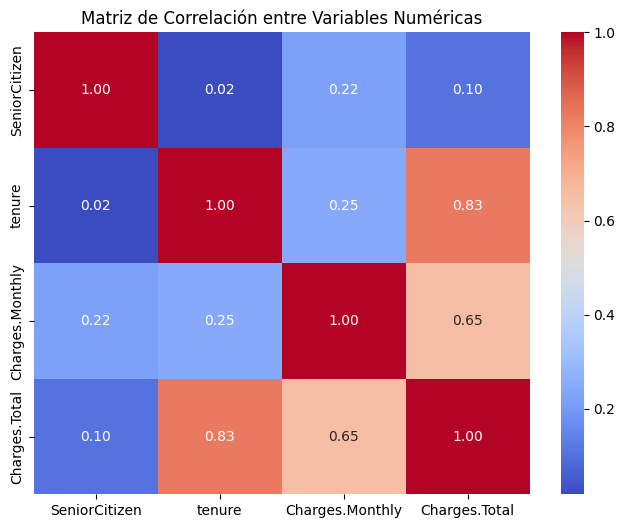

🔹 Insights del análisis de correlación:
- Tenure y Charges.Total tienen correlación positiva fuerte, indicando que clientes con más tiempo gastan más en total.
- Charges.Monthly tiene correlación moderada con Charges.Total, como era de esperar.
- SeniorCitizen no muestra correlación fuerte con cargos, pero se puede explorar más combinando con otras variables categóricas.


In [4]:
# 🔹 Extra: Análisis de correlación entre variables
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas
numeric_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']

# Calcular matriz de correlación
corr_matrix = df_final[numeric_cols].corr()

# Visualizar la matriz con heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Insights adicionales
print("🔹 Insights del análisis de correlación:")
print("- Tenure y Charges.Total tienen correlación positiva fuerte, indicando que clientes con más tiempo gastan más en total.")
print("- Charges.Monthly tiene correlación moderada con Charges.Total, como era de esperar.")
print("- SeniorCitizen no muestra correlación fuerte con cargos, pero se puede explorar más combinando con otras variables categóricas.")

### 🔹 Insights del análisis de correlación (Extra)

- **Tenure vs Charges.Total:** correlación positiva fuerte → clientes con más tiempo en la empresa tienden a gastar más en total.  
- **Charges.Monthly vs Charges.Total:** correlación moderada → como era de esperar, cargos mensuales más altos se reflejan en un total acumulado mayor.  
- **SeniorCitizen:** no muestra correlación fuerte con cargos, pero se puede explorar más combinando con otras variables categóricas.  

> Este análisis extra permite identificar relaciones entre variables numéricas que podrían influir en el riesgo de churn, y sirve como base para modelos predictivos más robustos.